<a href="https://colab.research.google.com/github/fendy07/chatbot-AI/blob/master/JM_Rule_Based_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rule Based Chatbot (Chatbot Berbasis Aturan)**

Pada tahun 1950-an, Alan Turing mengajukan pertanyaan, **Bisakah mesin berpikir?**

Sejak saat itu, praktisi Kecerdasan Buatan memiliki tantangan untuk membuat mesin dapat berpikir atau dengan kata sederhana menyamarkannya sebagai manusia.

**Apa itu Chatbot?**

Chatbot, juga dikenal sebagai chatterbot, bot, atau agen buatan, pada dasarnya adalah sebuah *software* yang digerakkan oleh *Artificial Intelligence*. Chatbot berfungsi untuk melakukan percakapan dengan pengguna melalui teks atau ucapan.

Sumber : [Creating a Simple Rule-Based Chatbot with Python](https://medium.com/geekculture/creating-a-simple-rule-based-chatbot-with-python-e7928d0573af)

# **Rule Based Approach**

**Apa itu Rule Based Chatbot?**

Ini adalah mesin chatbot yang didasarkan pada aturan khusus untuk menjawab teks yang diberikan oleh manusia. Respon yang dihasilkan oleh chatbot biasanya hampir akurat karena aturan yang diterapkannya. Namun, jika kita diberi pertanyaan yang tidak sesuai dengan aturan, chatbot tidak akan menjawabnya.

Metode penerjemahan rule based adalah salah satu metode penerjemahan bahasa alami yang menerapkan pengetahuan tata bahasa. Kemampuan dari mesin penerjemah tergantung dari aturan-aturan tata bahasa yang diterapkan pada sistem yang dirancang. Implementasi aturan ini pun tidak ditentukan oleh suatu pola tertentu, tetapi tergantung pada aturan bahasa sumber dan bahasa target.

Selain itu, chatbot berbasis aturan mungkin didasarkan pada aturan yang diberikan oleh manusia, tetapi itu tidak berarti bahwa kita tidak akan menggunakan kumpulan data apapun untuk membuatnya. Karena, **tujuan utama dari chatbot ini masih untuk meng-otomatisasi pertanyaan yang diberikan oleh manusia, oleh karena itu kita membutuhkan data untuk mengembangkan aturan**.

Dalam praktik kali ini, kita akan menggunakan chatbot berbasis aturan (Rule Based Chatbot) dengan menggunakan metode Cosine Similarity.

# **Membuat Korpus**

Contoh chatbot kali ini kita akan menggunakan studi kasus tentang **Kucing-Bot!** yang dimana kita akan mengetahui tentang informasi dan jenis-jenis hewan kucing domestik. Tahapan awal yang dilakukan adalah web scraping artikel internet tentang kucing yang ada di Wikipedia. Berikut sumber link artikel tentang kucing yaitu,

Bahasa Inggris: [Wikipedia-Cat](https://simple.wikipedia.org/wiki/Cat)
Bahasa Indonesia : [Wikipedia-Kucing](https://id.wikipedia.org/wiki/Kucing)

In [1]:
# Import Library
import bs4 as bs # Beautiful Soup4
import urllib.request # Requests

# Scraping data artikel tentang Kucing di Wikipedia
cat_data = urllib.request.urlopen('https://id.wikipedia.org/wiki/Kucing').read()

# Menemukan keseluruhan paragraf html dari laman web
cat_data_paragraphs = bs.BeautifulSoup(cat_data,'lxml').find_all('p')

# Membuat korpus dari keseluruhan paragraf artikel di situs web
cat_text = ''
# Membuat korpus teks huruf kecil pada paragraf tentang kucing
for p in cat_data_paragraphs:
    cat_text += p.text.lower()

print(cat_text)

kucing disebut juga kucing domestik[4][5] atau kucing rumah (nama ilmiah: felis silvestris catus atau felis catus) adalah sejenis mamalia karnivora dari keluarga felidae. kata "kucing" biasanya merujuk kepada "kucing" yang telah dijinakkan,[6] tetapi bisa juga bisa merujuk kepada "kucing besar" seperti singa dan harimau yang juga termasuk jenis kucing. 
kucing telah berbaur dengan kehidupan manusia paling tidak sejak 5.000 tahun sm, dengan ditemukannya kerangka kucing di pulau siprus.[7] sejak zaman 3.500 sm, orang mesir kuno telah menggunakan kucing untuk menjauhkan tikus atau hewan pengerat lain dari lumbung yang menyimpan hasil panen.[8]
saat ini, kucing adalah salah satu hewan peliharaan terpopuler di dunia.[9] kucing yang garis keturunannya tercatat secara resmi sebagai kucing trah atau galur murni (pure breed), seperti persia, siam, manx, dan sphinx. kucing seperti ini biasanya dibiakkan di tempat pemeliharaan hewan resmi. jumlah kucing ras hanyalah 1% dari seluruh kucing di duni

# **Text Cleaning Using Regular Expressions**

Setelah kita mengambil data artikel internet dengan cara web scraping maka kita perlu membersihkan teks untuk menghapus nomor bracket dan spasi kosong dengan menggunakan Regex atau Regular Expressions.

In [2]:
# Regular Expressions
import re

cat_text = re.sub(r'\s+', ' ',re.sub(r'\[[0-9]*\]', ' ', cat_text))
print(cat_text)

kucing disebut juga kucing domestik atau kucing rumah (nama ilmiah: felis silvestris catus atau felis catus) adalah sejenis mamalia karnivora dari keluarga felidae. kata "kucing" biasanya merujuk kepada "kucing" yang telah dijinakkan, tetapi bisa juga bisa merujuk kepada "kucing besar" seperti singa dan harimau yang juga termasuk jenis kucing. kucing telah berbaur dengan kehidupan manusia paling tidak sejak 5.000 tahun sm, dengan ditemukannya kerangka kucing di pulau siprus. sejak zaman 3.500 sm, orang mesir kuno telah menggunakan kucing untuk menjauhkan tikus atau hewan pengerat lain dari lumbung yang menyimpan hasil panen. saat ini, kucing adalah salah satu hewan peliharaan terpopuler di dunia. kucing yang garis keturunannya tercatat secara resmi sebagai kucing trah atau galur murni (pure breed), seperti persia, siam, manx, dan sphinx. kucing seperti ini biasanya dibiakkan di tempat pemeliharaan hewan resmi. jumlah kucing ras hanyalah 1% dari seluruh kucing di dunia, sisanya adalah k

Proses diatas dilakukan untuk menghapus nomor bracket dari korpus teks yang akan digunakan ke tahapan selanjutnya.

# **Tokenisasi**

Pada tahapan ini kita akan membuat daftar kalimat berdasarkan corpus yang telah kita buat sebelumnya dengan cara tokenisasi. Tokenisasi adalah suatu proses pemecahan kalimat menjadi kata-kata atau unit dan unit kata tersebut disebut dengan nama **token**.

In [3]:
# Tokenisasi dengan NLTK
import nltk
# Download package punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
cat_sentences = nltk.sent_tokenize(cat_text)
# Perintah hasil tokenisasi kalimat
print(cat_sentences)

['kucing disebut juga kucing domestik atau kucing rumah (nama ilmiah: felis silvestris catus atau felis catus) adalah sejenis mamalia karnivora dari keluarga felidae.', 'kata "kucing" biasanya merujuk kepada "kucing" yang telah dijinakkan, tetapi bisa juga bisa merujuk kepada "kucing besar" seperti singa dan harimau yang juga termasuk jenis kucing.', 'kucing telah berbaur dengan kehidupan manusia paling tidak sejak 5.000 tahun sm, dengan ditemukannya kerangka kucing di pulau siprus.', 'sejak zaman 3.500 sm, orang mesir kuno telah menggunakan kucing untuk menjauhkan tikus atau hewan pengerat lain dari lumbung yang menyimpan hasil panen.', 'saat ini, kucing adalah salah satu hewan peliharaan terpopuler di dunia.', 'kucing yang garis keturunannya tercatat secara resmi sebagai kucing trah atau galur murni (pure breed), seperti persia, siam, manx, dan sphinx.', 'kucing seperti ini biasanya dibiakkan di tempat pemeliharaan hewan resmi.', 'jumlah kucing ras hanyalah 1% dari seluruh kucing di 

Gagasan menggunakan proses list sentence atau daftar kalimat adalah untuk mengukur metode Cosine Similarity yaitu antara teks kueri yang kita masukkan ke dalam chatbot pada teks dengan list sentence atau daftar kalimat. Dan pada akhirnya, hasil dari teks apa yang dilihat kemiripan terdekat (**Highest Cosine Similarity**) akan menjadi respon bot.

# **Membuat Chatbot**

Setelah melakukan tokenisasi untuk memproses daftar kalimat maka tahapan selanjutnya membuat chatbot dengan menggunakan metode **Bag Of Words** (BoW) untuk mengetahui jumlah kata tiap dokumen teks, kemudian untuk Algoritma TF-IDF (**Term Frequency - Inverse Document Frequency**) sebagai ekstraksi fitur teks dan **Cosine Similarity** untuk menentukan suatu kemiripan teks yang akan mencari jawaban atau respon bot.

Dalam proses ini, data teks berupa korpus akan diubah menjadi vektor numerik. Hal ini agar komputer dapat memahami bahasa natural yang telah di konversi menjadi bahasa mesin atau kode biner.

In [5]:
# TF-IDF Algorithm
from sklearn.feature_extraction.text import TfidfVectorizer
# Cosine Similartity
from sklearn.metrics.pairwise import cosine_similarity

def chatbot_response(user_query):
  # Menambahkan kueri ke sentences list atau daftar kalimat
  cat_sentences.append(user_query)
  # Membuat basis vektor kalimat ke dalam list
  vectorizer = TfidfVectorizer()
  sentences_vectors = vectorizer.fit_transform(cat_sentences)
  '''Mengukur cosine similarity dan ambil indeks terdekat yang kedua
  karena indeks pertama adalah masukkan teks kueri atau permintaan user'''
  vector_values = cosine_similarity(sentences_vectors[-1], sentences_vectors)
  answer = cat_sentences[vector_values.argsort()[0][-2]]
  '''Pemeriksaan akhir untuk memastikan adanya hasil atau respon bot.
  Jika keseluruhannya bernilai 0, maka teks yang di input tidak terdapat dalam korpus'''
  input_check = vector_values.flatten()
  input_check.sort()

  if input_check[-2] == 0:
    return "Mohon dicoba lagi yaa"
  else:
    return answer

Jika kita lihat dalam code ini bisa disimpulkan bahwa proses konversi teks ke vektor numerik akan menjadi gambaran seperti ini.

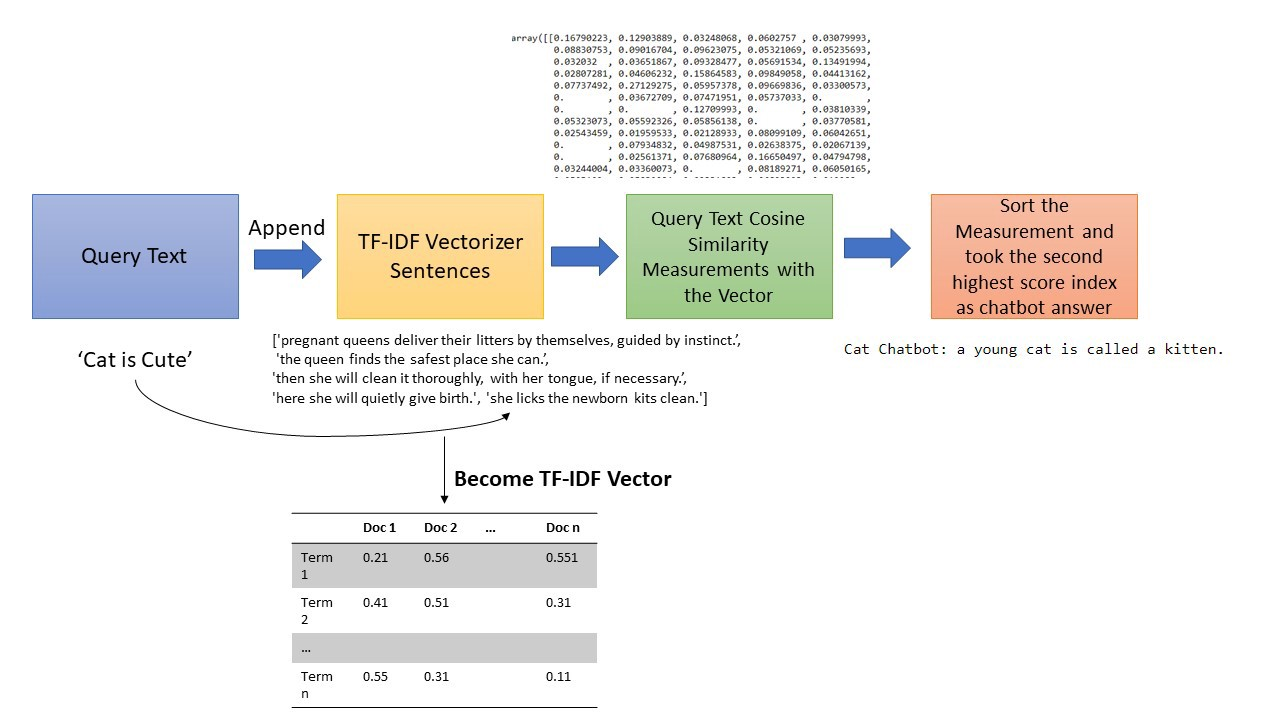

In [6]:
print("Halo, saya Kucing-Bot. Apa pertanyaan Meowmu?:")
while(True):
  query = input().lower()
  # Statement jika ada kata selamat tinggal
  if query not in ['bye', 'goodbye', 'take care', 'sayonara', 'dadah', 'selamat tinggal']:
    print("😺 Kucing-Bot: ", end="")
    print(chatbot_response(query))
    cat_sentences.remove(query)
  else:
    print("See You Again!")
    break

Halo, saya Kucing-Bot. Apa pertanyaan Meowmu?:
hai
😺 Kucing-Bot: Mohon dicoba lagi yaa
kucing
😺 Kucing-Bot: jumlah kucing ras hanyalah 1% dari seluruh kucing di dunia, sisanya adalah kucing dengan keturunan campuran, seperti kucing liar atau kucing kampung.
ras kucing
😺 Kucing-Bot: ada banyak macam ras kucing, beberapa di antaranya adalah sebagai berikut: ras bali adalah kucing ras asli indonesia yang berasal dari pulau bali.
jenis-jenis kucing
😺 Kucing-Bot: jenis scottish fold adalah salah satu jenis kucing dengan mutasi genetik yang langka ini.
kucing liar
😺 Kucing-Bot: dibandingkan dengan anjing, kucing tidak mengalami perubahan besar selama proses domestikasi karena bentuk dan perilaku kucing domestik tidak secara radikal berbeda dari kucing liar dan kucing domestik sangat mampu bertahan di alam liar.
cakar kucing
😺 Kucing-Bot: jumlah kucing ras hanyalah 1% dari seluruh kucing di dunia, sisanya adalah kucing dengan keturunan campuran, seperti kucing liar atau kucing kampung.
kumis 

# **Kesimpulan**

Chatbot berbasis aturan atau *Rule Based Chatbot* hanya mengikuti instruksi atau aturan sesuai dengan masukan teks dari pengguna. Kelemahan dari Chatbot berbasis aturan ini tidak dapat menjawab pertanyaan yang kompleks sehingga chatbot ini hanya digunakan untuk pertanyaan yang sederhana saja. Dan dalam code ini mengambil dari sumber artikel Medium tentang **[Creating a Simple Rule-Based Chatbot with Python](https://medium.com/geekculture/creating-a-simple-rule-based-chatbot-with-python-e7928d0573af)** yang ditulis oleh Cornelius Yudha Wijaya.